## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [19]:
!pip install catboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import catboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.metrics import mean_squared_error

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [5]:
null_value_stats = train_df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
train_df.fillna(-999, inplace=True)
test_df.fillna(-999, inplace=True)

In [10]:
X = train_df.drop('SalePrice', axis=1)
y = train_df.SalePrice

In [13]:
print(X.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [14]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.75, random_state=42)

X_test = test_df

C:\Users\16515134\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
from catboost import CatBoostRegressor, Pool, cv
from sklearn.metrics import accuracy_score

In [22]:
model = CatBoostRegressor(
    loss_function='RMSE',
    random_seed=42,
    logging_level='Silent'
)

In [23]:
model.fit(
    X_train, y_train,
    cat_features=categorical_features_indices,
    eval_set=(X_validation, y_validation),
#     logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [25]:
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    model.get_params(),
    plot=True
)

MetricVisualizer(data={'catboost_info': {'path': 'catboost_info', 'name': 'catboost_info', 'content': {'passed…

In [26]:
cv_data.columns

Index(['test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean', 'train-RMSE-std'], dtype='object')

In [52]:
print('Best validation RMSE score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-RMSE-mean']),
    cv_data['test-RMSE-std'][cv_data['test-RMSE-mean'].argmin],
    cv_data['test-RMSE-mean'].argmin
))

Best validation RMSE score: 192403.12±5405.14 on step <bound method Series.idxmin of 0      192403.115477
1      187414.704371
2      182610.630133
3      177946.427839
4      173287.434656
5      168854.102606
6      164534.428298
7      160430.889848
8      156357.287513
9      152356.905560
10     148716.737990
11     145120.939805
12     141630.603179
13     138117.109118
14     134730.717425
15     131444.320799
16     128299.768733
17     125134.658608
18     122134.354042
19     119229.486946
20     116347.129359
21     113703.220562
22     111121.068088
23     108483.991155
24     106031.849104
25     103697.708148
26     101320.295506
27      99015.146220
28      96851.416277
29      94894.962417
           ...      
970     31638.631860
971     31639.342414
972     31640.722079
973     31636.964425
974     31634.717720
975     31632.206722
976     31629.426513
977     31630.135398
978     31631.588069
979     31628.747135
980     31627.680476
981     31619.938227
982     3161

C:\Users\16515134\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\common.py:405: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return maybe_callable(obj, **kwargs)


In [53]:
print('Precise validation RMSE score: {}'.format(np.min(cv_data['test-RMSE-mean'])))

Precise validation RMSE score: 31602.81828735462


In [54]:
predictions = model.predict(X_test)
predictions_staged = model.staged_predict(X_test)
print(predictions[:10])
print(predictions_staged)

[36789.79559383 40610.56233444 43960.232116   47271.25605263
 54484.66867169 44659.18821861 42563.22475873 44967.47178465
 50571.85651435 36481.5120278 ]
<generator object CatBoost._staged_predict at 0x000001B2AC72FDB0>


In [55]:
model_without_seed = CatBoostRegressor(iterations=10, logging_level='Silent')
model_without_seed.fit(X, y, cat_features=categorical_features_indices)

print('Random seed assigned for this model: {}'.format(model_without_seed.random_seed_))

Random seed assigned for this model: 318858703656735


In [56]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_validation, y_validation, cat_features=categorical_features_indices)

In [57]:
model = CatBoostRegressor(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostRegressor(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation RMSE: {:.4}'.format(
    mean_squared_error(y_validation, model.predict(X_validation))
))
print('')

print('Best model validation RMSE: {:.4}'.format(
    mean_squared_error(y_validation, best_model.predict(X_validation))
))

Simple model validation RMSE: 9.005e+08

Best model validation RMSE: 8.955e+08


In [59]:
preds = best_model.predict(X_test)

In [93]:
preds = pd.DataFrame(preds,columns=['SalePrice'])

In [103]:
sub = sub.join(preds)

In [107]:
sub.to_csv('submission.csv', index=False)

In [21]:
train = pd.read_csv('train.csv')

test = pd.read_csv('test.csv')

labels = train.SalePrice

In [132]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [133]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [134]:
labels.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

С какими типами признаков вы столкнулись?


Ответ:категориальные, порядковые, колличественные

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html

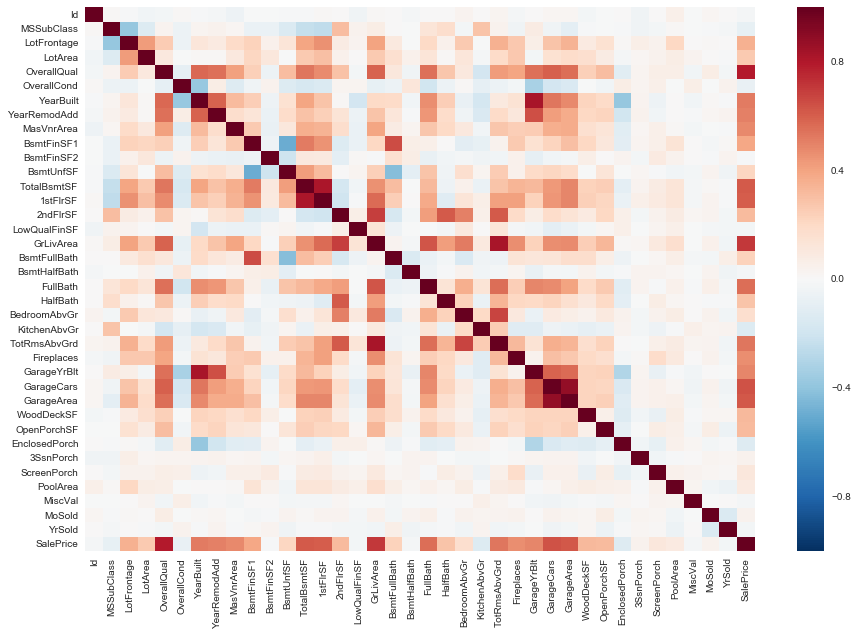

In [135]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat)

In [4]:
print("{0:15}\t{1}\t{2}\t{3}".format("Name", "NaNs", "Type", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}\t{3}".format(col, train[col].isnull().mean(),train[col].dtype, train[col].nunique()))


Name           	NaNs	Type	#unique
Id             	0.00	int64	1460
MSSubClass     	0.00	int64	15
MSZoning       	0.00	object	5
LotFrontage    	0.18	float64	110
LotArea        	0.00	int64	1073
Street         	0.00	object	2
Alley          	0.94	object	2
LotShape       	0.00	object	4
LandContour    	0.00	object	4
Utilities      	0.00	object	2
LotConfig      	0.00	object	5
LandSlope      	0.00	object	3
Neighborhood   	0.00	object	25
Condition1     	0.00	object	9
Condition2     	0.00	object	8
BldgType       	0.00	object	5
HouseStyle     	0.00	object	8
OverallQual    	0.00	int64	10
OverallCond    	0.00	int64	9
YearBuilt      	0.00	int64	112
YearRemodAdd   	0.00	int64	61
RoofStyle      	0.00	object	6
RoofMatl       	0.00	object	8
Exterior1st    	0.00	object	15
Exterior2nd    	0.00	object	16
MasVnrType     	0.01	object	4
MasVnrArea     	0.01	float64	327
ExterQual      	0.00	object	4
ExterCond      	0.00	object	5
Foundation     	0.00	object	6
BsmtQual       	0.03	object	4
BsmtCond       	0.03	ob

In [5]:
train.CentralAir = train.CentralAir.map({'Y':1, 'N':0})

In [6]:
test.CentralAir = train.CentralAir.map({'Y':1, 'N':0})

In [7]:
train.Street = train.Street.map({'Pave':1, 'Grvl':0})

In [8]:
test.Street = train.Street.map({'Pave':1, 'Grvl':0})

In [9]:
train.Utilities = train.Utilities.map({'AllPub':1, 'NoSeWa':0})

In [10]:
test.Utilities = train.Utilities.map({'AllPub':1, 'NoSeWa':0})

In [11]:
categorial_f = [f for f in train.columns if train[f].dtype == 'O']

In [12]:
for i in range(0, len(categorial_f)):
    f1 = categorial_f[i]
    for j in range(i+1, len(categorial_f)):
        f2 = categorial_f[j]
        new_factor = f1+'_MERDGE_'+f2
        train[new_factor] = train[f1] + train[f2]

In [13]:
for i in range(0, len(categorial_f)):
    f1 = categorial_f[i]
    for j in range(i+1, len(categorial_f)):
        f2 = categorial_f[j]
        new_factor = f1+'_MERDGE_'+f2
        test[new_factor] = test[f1] + test[f2]

In [14]:
new_categorial_f_1 = [f for f in train.columns if train[f].dtype == 'O']

In [15]:
new_categorial_f_2 = [f for f in test.columns if test[f].dtype == 'O']

In [18]:
print(len(train.columns))

861


In [152]:
def process_factors(train, target, categorial_factors, test):
    
    #all_train = train
    #del train[target]
    for i in range(0,1):
        dev_data, val_data, dev_labels, val_labels = model_selection.train_test_split(train,
                                                                                      train[target], test_size = 0.3)
        
        #categorial_factors = ['PavedDrive_MERDGE_Fence']
        for factor in categorial_factors:
            dev_t = dev_data.groupby(by=factor).aggregate(np.mean).reset_index()[[factor,target]]
            val_t = val_data.groupby(by=factor).aggregate(np.mean).reset_index()[[factor,target]]
            dev_data= dev_data.join(how='left', other=dev_t.set_index(factor), on=factor, rsuffix='_for_'+factor)
            val_data = val_data.join(how='left', other=val_t.set_index(factor), on=factor, rsuffix='_for_'+factor)
        #all_features = [f for f in train.columns if f != 'SalePrice']    
        #dev_data = dev_data[all_features]
        #val_data = val_data[all_features]
            
    return dev_data, val_data, test

In [153]:
train_dev, train_val, test = process_model(train, 'SalePrice', new_categorial_f_1, test)

In [154]:
clf = lgbm.LGBMRegressor(learning_rate=0.05, n_estimators=10000)

In [155]:
target = 'SalePrice'
train_dev = train_dev.select_dtypes(exclude=['object'])
train_val = train_val.select_dtypes(exclude=['object'])
clf.fit(train_dev[[col for col in train_dev.columns if col != target]], train_dev[target])

C:\Users\Kuptsov1-DA\AppData\Roaming\Python\Python36\site-packages\lightgbm\basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
C:\Users\Kuptsov1-DA\AppData\Roaming\Python\Python36\site-packages\lightgbm\basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.05,
       max_bin=255, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [156]:
predicted = clf.predict(train_val[[col for col in train_val.columns if col != target]])

In [157]:
from sklearn.metrics import mean_squared_error
import math

In [158]:
math.sqrt(mean_squared_error(train_val[target], predicted))

27832.986253725336

In [159]:
math.sqrt(mean_squared_error(train_val[target], predicted))

27832.986253725336

In [160]:
import lightgbm as lgbm

In [162]:
preds = clf.predict(test)

ValueError: Number of features of the model must match the input. Model n_features_ is 860 and input n_features is 2500 

# Далее будет Бустинг

In [30]:
to_drop = [#здесь список бесполезных по вашему мнению фичей]
to_replace_to_none = ["Fence", "FireplaceQu", "Alley"] #пример

for col in to_replace_to_none:
    all[col].fillna("No" + col, inplace=True)
    
all.drop(to_drop, axis=1, inplace=True, errors="ignore")
all.fillna(-1, inplace=True)

SyntaxError: invalid syntax (<ipython-input-30-43fd149701e5>, line 2)

Какие фичи кажутся вам самыми значимыми? Оцените значимость признаков, опираясь на описанный выше алгоритм, либо на ваш личный опыт, постройте для трех самых значимых графики. Как распределены данные? По какому закону?

In [10]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
#code

In [ ]:
categorial = [#отобранные вами категориальные признаки]
    all[col] = all[col].factorize()[0]
    
train = all.iloc[:train.shape[0]]
test = all.iloc[train.shape[0]:]

Попробуйте запустить обучение на разных алгоритмах (пример запуска в семинарах):
1. Линейная регрессия http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
2. Решающее дерево http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
3. Случайный лес http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
4. Градиентный бустинг http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

И любые другие модели, которые покажутся вам интересными :)

P.S.не забудьте использовать **cross_validation** и **K-Fold!**
Также можно распараллелить процесс обучения, если параметру *n_jobs* в регрессор передать значение *-1*.
С помощью  *cross_val_score* можно оценивать качество построенной модели.
Также у каждого регрессора есть множество *параметров*. Подробно про них можно прочитать в документации http://scikit-learn.org

Пример запуска модели можно найти в **Seminars/Seminar2**.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regr = LinearRegression(#тут параметры)
print(cross_val_score(clf, train, np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

In [73]:
def submit(preds):
    submission = pd.read_csv(r"C:\Users\16515134\Documents\Sberbank_ML-master\Hometasks\Hometask_2\sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

In [84]:
predictions = pd.DataFrame(preds, columns=['SalePrice'])

In [86]:
predictions.to_csv("submission.csv")

In [87]:
y_train

1023    191000
810     181000
1384    105000
626     139900
813     157900
839     130500
370     172400
54      130000
534     178000
785     161500
312     119900
1174    239000
109     190000
430      85400
100     205000
513     134000
1190    168000
266     185000
1290    180500
296     152000
506     215000
901     153000
809     106000
377     340000
286     159000
1400    120000
1048    115000
126     128000
618     314813
292     131000
         ...  
747     265979
252     173000
21      139400
1337     52500
459     110000
1184    186700
276     201000
955     145000
1215    125000
385     192000
805     227680
1437    394617
343     266000
769     538000
1332    100000
130     226000
871     200500
1123    118000
1396    160000
87      164500
330     119000
1238    142500
466     167000
121     100000
1044    278000
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1095, dtype: int64

In [60]:
#функция для формирования файла для отправки в соревнование
def submit(preds):
    submission = pd.read_csv("sample_submission.csv")
    submission["SalePrice"] = preds
    submission.to_csv("submission.csv", index=False)

regr = LinearRegression(#тут параметры)
regr.fit(train, np.log1p(labels))
preds = regr.predict(test)
submit(np.expm1(preds))

def code_freq(data, col):
    return data[col].map(data.groupby(col).count().iloc[:, 0] / data.shape[0])



SyntaxError: invalid syntax (<ipython-input-60-792ab3e7157d>, line 8)

### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

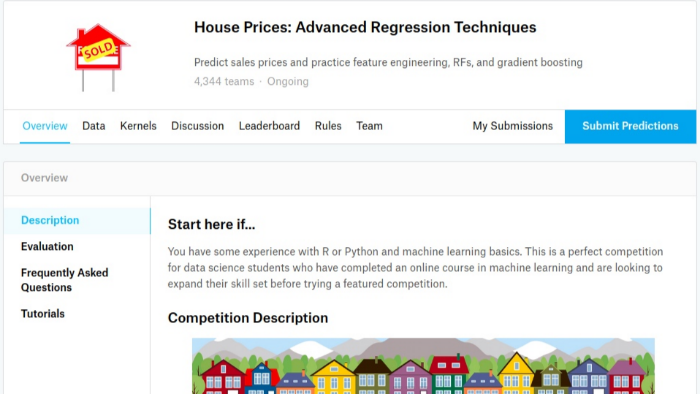

In [16]:
from IPython.display import Image
Image("1.png")

Идеи, как можно улучшить результат:
* Найти какие категориальные признаки являются ординальными и закодировать их соответственно
* Найти наиболее важные категориальные признаки и попробовать их закодировать разными способами
* Потюнить регрессор
* Сгенерировать новые признаки

### Часть 4
Опишите полученные результаты, какого скора Вы смогли добиться, какое место заняли? Какой алгоритм оказался лучше других? Можете ли Вы объяснить, почему так вышло?

Ответ: